### Use KNearestNeighbourRegressor to Predict Price of House.

***Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt



> Use pandas to get some insights into the data 

> Show some interesting visualization of the data 

> Manage data for training & testing (20)

> Finding a better value of k (10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### step 1 : Use pandas to get some insights into the data

In [2]:
dataset=pd.read_csv('TestData.csv')

In [3]:
dataset.head()

,S.NO.,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
dataset.loc[517,:]

S.NO.            521.000
Sqft            1384.062
Floor              6.000
TotalFloor        13.000
Bedroom            3.000
Living.Room        2.000
Bathroom           2.000
Price          50000.000
Name: 517, dtype: float64

In [5]:
dataset.tail()

,S.NO.,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000
644,648,1376.946,6,7,3,2,1,36000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.NO.        645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [7]:
dataset.isna().sum()

S.NO.          0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [8]:
dataset.dtypes

S.NO.            int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [9]:
dataset.describe()

,S.NO.,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


### Step 2: Show some interesting visualization of the data 

<AxesSubplot: xlabel='Sqft', ylabel='Price'>

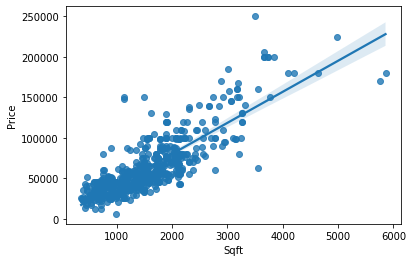

In [10]:
import seaborn as sns
sns.regplot(x=dataset['Sqft'], y=dataset['Price'])

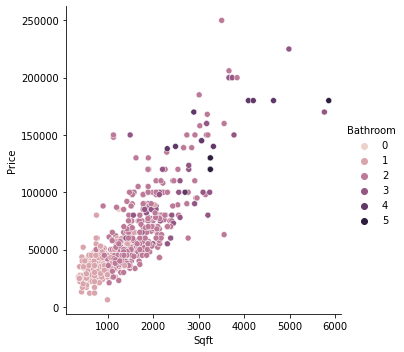

In [11]:
g=sns.relplot(data=dataset,x='Sqft',y='Price',hue='Bathroom')

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

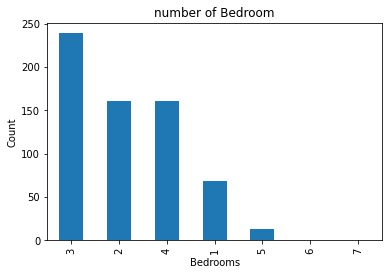

In [12]:
dataset['Bedroom'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

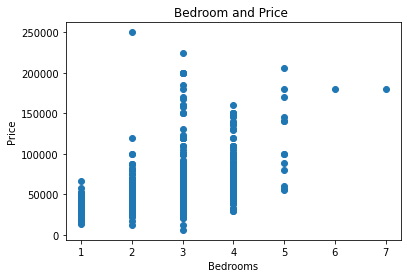

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [13]:
plt.scatter(dataset.Bedroom,dataset.Price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

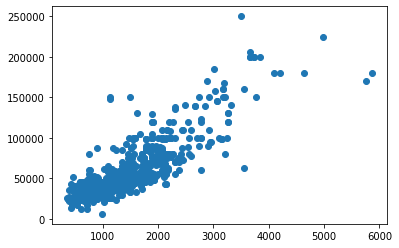

In [14]:
plt.scatter(dataset['Sqft'],dataset['Price'])

<AxesSubplot: >

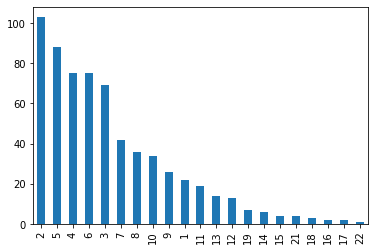

In [15]:
dataset.Floor.value_counts().plot(kind='bar')

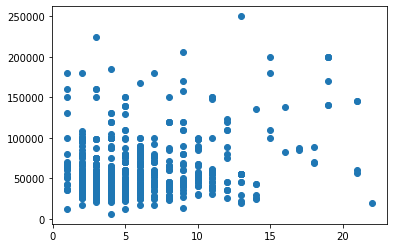

In [16]:
plt.scatter(dataset.Floor,dataset.Price)

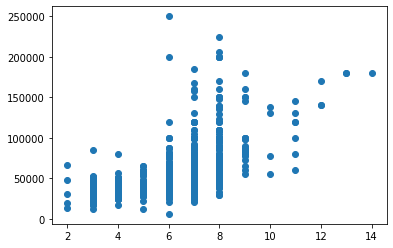

In [17]:
plt.scatter((dataset['Bedroom']+dataset['Living.Room']+dataset['Bathroom']),dataset['Price'])


C:\Users\vip\AppData\Local\Temp\ipykernel_5756\1161381488.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.catplot(data=dataset,x='Sqft',y='Price',kind='bar',ci=None)


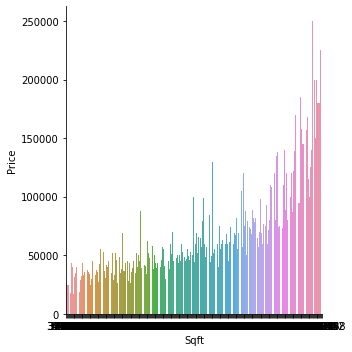

In [18]:
g=sns.catplot(data=dataset,x='Sqft',y='Price',kind='bar',ci=None)

### Step 3: Manage data for training & testing (20)

In [19]:
# split dataset
x = dataset.iloc[:, 1:7]
y = dataset.iloc[:,7]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [20]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
x_train
y_train
x_test
y_test

516
516
129
129


352    100000
530     28000
315     55000
249     43000
266     25000
        ...  
440     17000
239     68000
501    158000
34      46000
427    168000
Name: Price, Length: 129, dtype: int64

In [21]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

### Step 4:  Finding a better value of k (10)

In [22]:
# Define the model: Init K-NN
reg = KNeighborsRegressor(n_neighbors=5)

In [23]:
# Fit Model
reg.fit(X_train, y_train)

KNeighborsRegressor()

In [24]:
test_data=np.array(dataset.loc[517,:])
test1=test_data.reshape(1,-1)
test2=test1[0][1:7]
test3=test2.reshape(1,-1)

In [25]:
dataset.loc[517,:]

S.NO.            521.000
Sqft            1384.062
Floor              6.000
TotalFloor        13.000
Bedroom            3.000
Living.Room        2.000
Bathroom           2.000
Price          50000.000
Name: 517, dtype: float64

In [26]:
x=reg.predict(test3)
x

array([193000.])

In [27]:
# Predict the test set results
y_pred = reg.predict(X_test)
y_pred

array([ 80600. ,  26920. ,  55000. ,  58799.8,  36360. , 123777.4,
       105600. ,  54760. ,  34600. ,  40000. ,  45999.8,  31360. ,
        33377.6,  47840. ,  45600. , 100000. ,  47355.2,  31800. ,
        53100. ,  42177.6,  37800. , 126000. ,  76400. ,  88400. ,
        53100. ,  84800. ,  88599.8,  42400. ,  88399.6,  65799.8,
        65000. ,  31800. ,  74800. ,  96777.4,  30400. ,  23720. ,
        55500. ,  95000. ,  57319.8,  40540. ,  33320. ,  39977.6,
        76600. ,  46477.6,  92599.8,  43000. ,  65200. ,  29760.2,
       175999.8,  60600. , 166800. ,  53100. ,  31360. ,  46199.8,
        59500. ,  95000. ,  65600. ,  64000. ,  97000. ,  88600. ,
        73600. ,  71200. ,  44200.4,  26000. ,  78400. ,  87400. ,
        49799.8,  35960. ,  40000. ,  31560. ,  31577.6,  62977.4,
        48400. ,  60600. ,  90000. ,  28820. ,  46400. ,  44600. ,
        90400. ,  30320. ,  39800. ,  39160. ,  87000. ,  32760.2,
        40540. ,  72399.8,  59000. ,  84599.6,  49477.6,  3516

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test,y_pred)

0.769752767469208

In [30]:
reg.score(X_test,y_test)

0.769752767469208

### 1. Sqft Vs Price

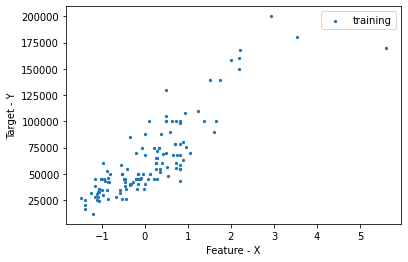

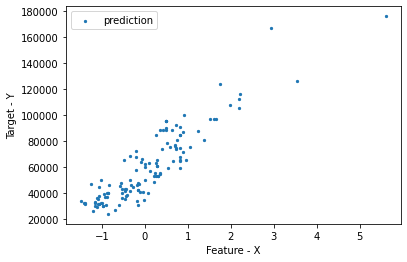

In [32]:
plt.scatter(X_test[:,0],y_test,s=5, label='training')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()
plt.scatter(X_test[:,0],y_pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

### 2. Floor Vs Price

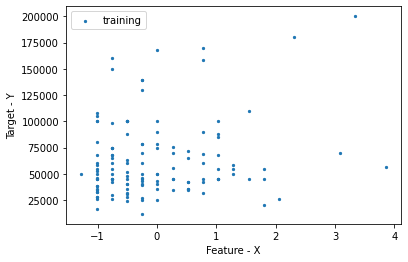

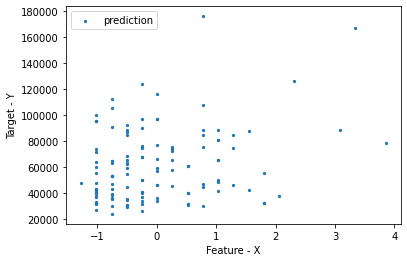

In [33]:
# print(y_test,y_pred)
plt.scatter(X_test[:,1],y_test,s=5, label='training')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()
plt.scatter(X_test[:,1],y_pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

### 3. Totalfloor Vs Price

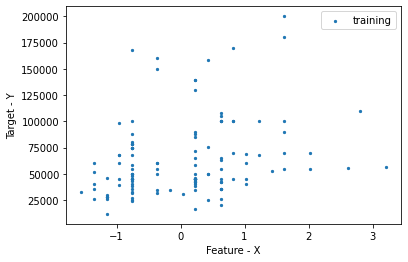

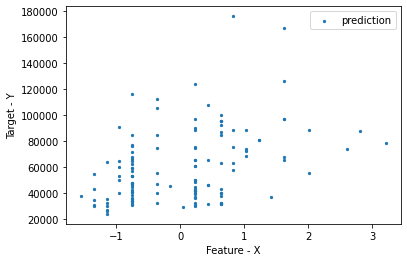

In [34]:
plt.scatter(X_test[:,2],y_test,s=5, label='training')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()
plt.scatter(X_test[:,2],y_pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

### 4. Bedroom Vs Price

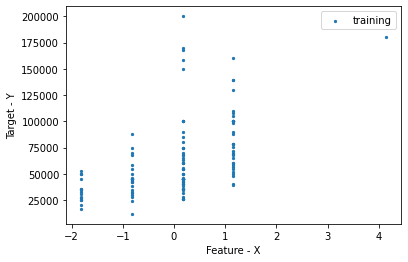

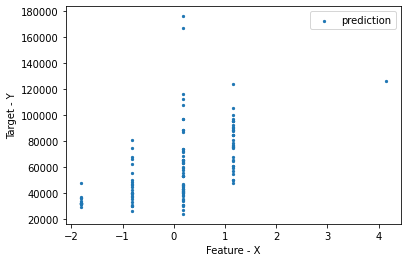

In [35]:
plt.scatter(X_test[:,3],y_test,s=5, label='training')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()
plt.scatter(X_test[:,3],y_pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

### 5.Living Room Vs Price

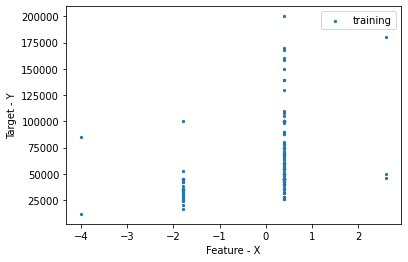

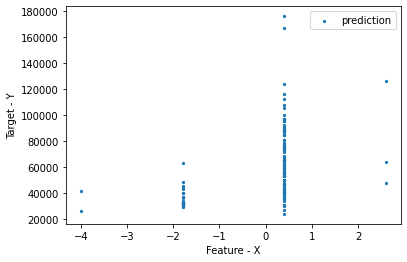

In [36]:
plt.scatter(X_test[:,4],y_test,s=5, label='training')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()
plt.scatter(X_test[:,4],y_pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

### 6. Bathroom Vs Price

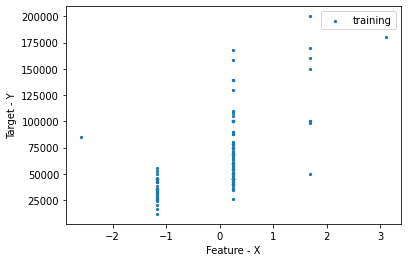

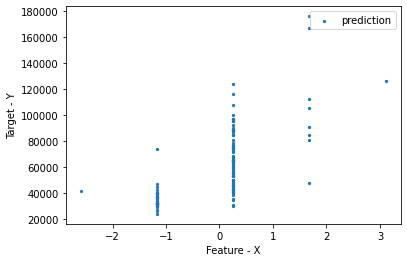

In [37]:
plt.scatter(X_test[:,5],y_test,s=5, label='training')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()
plt.scatter(X_test[:,5],y_pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()